# imports 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [2]:
pd.options.display.max_rows = 500

# load data

In [5]:
day = -2
market_data = pd.read_csv(f"./round_1_data/prices_round_1_day_{day}.csv.csv", sep=";", header=0)
trade_history = pd.read_csv(f"./round_1_data/trades_round_1_day_{day}_nn.csv.csv", sep=";", header=0)

In [6]:
market_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,SQUID_INK,1834,23,NaN,NaN,NaN,NaN,1838,23,NaN,NaN,NaN,NaN,1836.0,0.000000
1,1,0,RAINFOREST_RESIN,9998,9,9995.0,23.0,NaN,NaN,10005,23,NaN,NaN,NaN,NaN,10001.5,0.000000
2,1,0,KELP,2032,23,NaN,NaN,NaN,NaN,2035,23,NaN,NaN,NaN,NaN,2033.5,0.000000
3,1,100,KELP,2034,1,2033.0,2.0,2032.0,22.0,2035,22,NaN,NaN,NaN,NaN,2034.5,0.000000
4,1,100,SQUID_INK,1837,1,1836.0,2.0,1835.0,22.0,1839,22,NaN,NaN,NaN,NaN,1838.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,99800,SQUID_INK,1814,26,NaN,NaN,NaN,NaN,1817,26,NaN,NaN,NaN,NaN,1815.5,1246.000000
2996,1,99800,RAINFOREST_RESIN,9996,1,9995.0,25.0,NaN,NaN,10002,5,10004.0,1.0,10005.0,25.0,9999.0,2026.000000
2997,1,99900,SQUID_INK,1816,27,NaN,NaN,NaN,NaN,1819,28,NaN,NaN,NaN,NaN,1817.5,1246.000000
2998,1,99900,RAINFOREST_RESIN,9998,6,9996.0,1.0,9995.0,27.0,10004,1,10005.0,27.0,NaN,NaN,10001.0,2026.000000


# research

In [7]:
starfruit_data = market_data[market_data['product'] == 'SQUID_INK'].reset_index(drop=True)

In [8]:
starfruit_data['bid_volume_1'].value_counts()

bid_volume_1
1     88
22    81
26    73
25    72
29    71
24    70
30    68
28    68
23    63
27    55
31    51
21    48
2     35
32    26
20    23
4     18
3     15
5     14
6      8
7      7
34     6
33     6
35     6
38     5
36     3
18     3
37     3
8      3
19     2
14     2
10     2
39     1
11     1
9      1
17     1
15     1
Name: count, dtype: int64

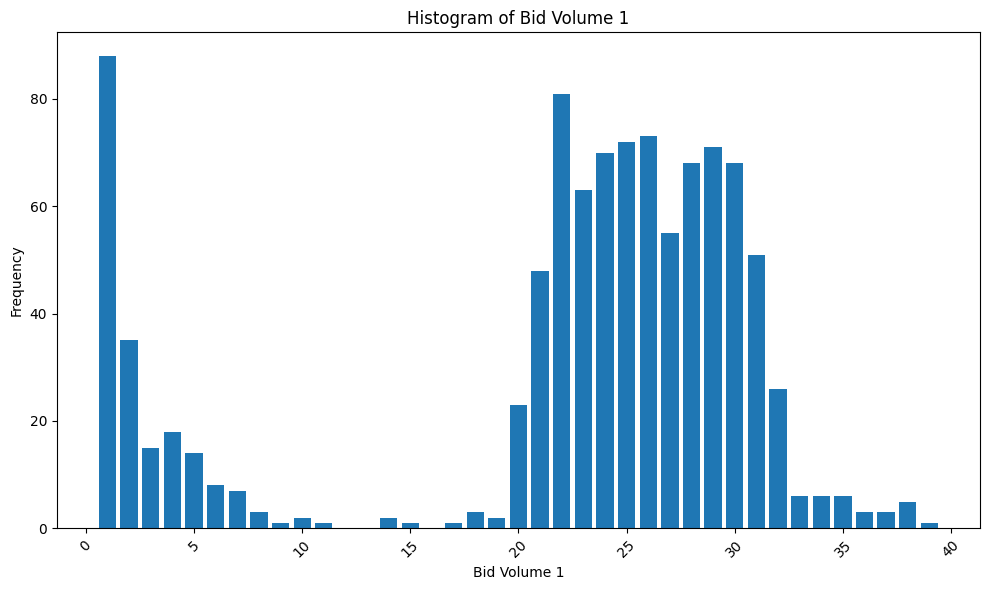

In [9]:
# Get the value counts of bid_volume_1
bid_volume_counts = starfruit_data['bid_volume_1'].value_counts()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(bid_volume_counts.index, bid_volume_counts.values)
plt.xlabel('Bid Volume 1')
plt.ylabel('Frequency')
plt.title('Histogram of Bid Volume 1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

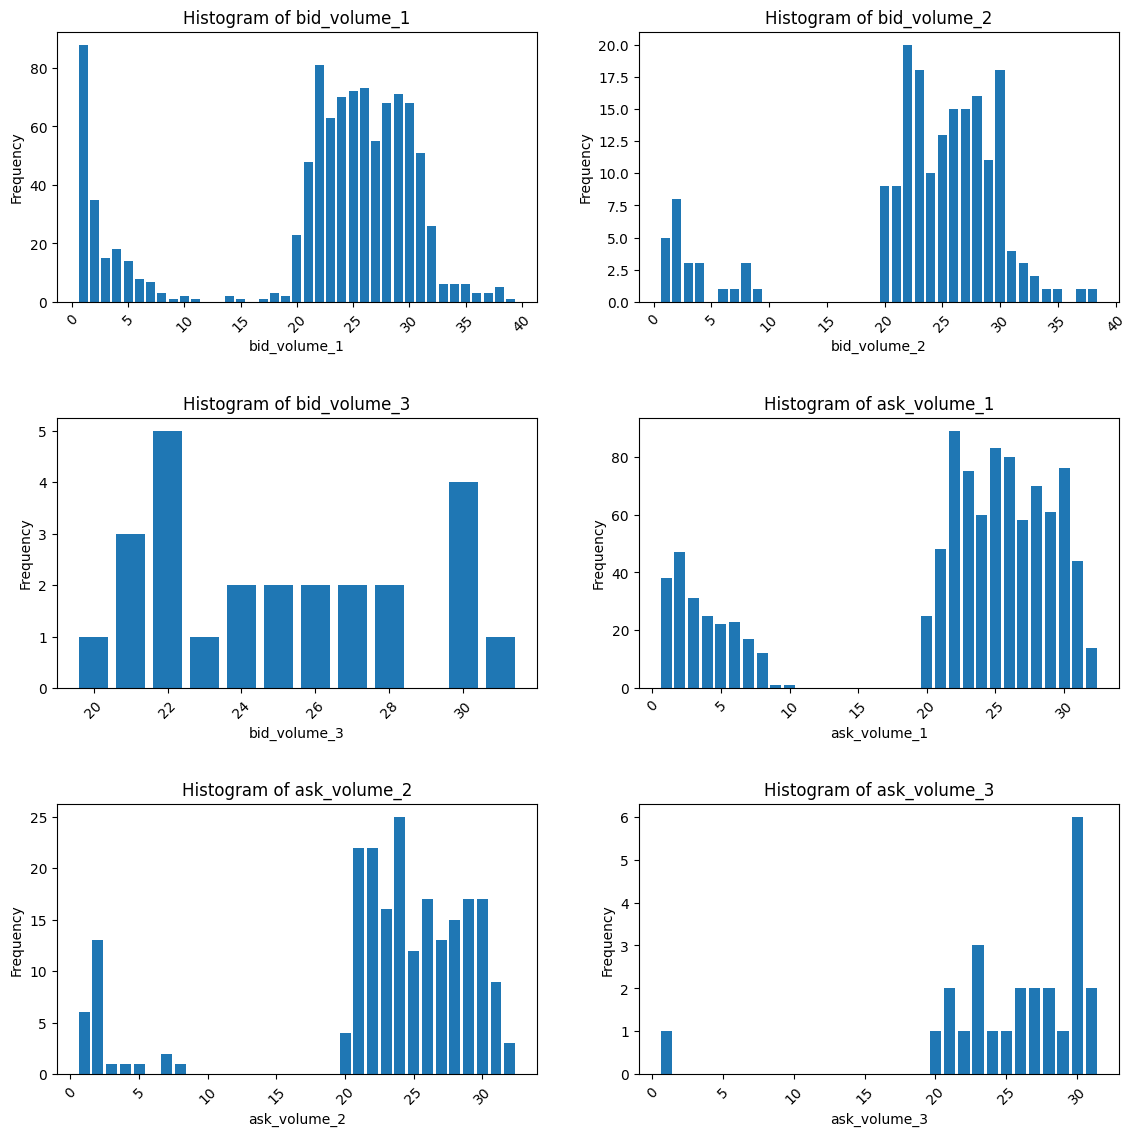

In [10]:
columns_to_plot = ['bid_volume_1', 'bid_volume_2', 'bid_volume_3',
                   'ask_volume_1', 'ask_volume_2', 'ask_volume_3']

num_plots = len(columns_to_plot)
num_rows = (num_plots + 1) // 2
num_cols = 2

plt.figure(figsize=(12, 4 * num_rows))

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(num_rows, num_cols, i)
    
    volume_counts = starfruit_data[column].value_counts()
    
    plt.bar(volume_counts.index, volume_counts.values)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)

plt.show()

In [66]:
def calculate_mm_mid(row):
    # Find the best bid with volume >= 20
    for i in range(1, 4):
        if row[f'bid_volume_{i}'] >= 0:
            best_bid = row[f'bid_price_{i}']
            break
    else:
        best_bid = None

    # Find the best ask with volume >= 20
    for i in range(1, 4):
        if row[f'ask_volume_{i}'] >= 0:
            best_ask = row[f'ask_price_{i}']
            break
    else:
        best_ask = None

    # Calculate the mid price if both best bid and ask are found
    if best_bid is not None and best_ask is not None:
        return (best_bid + best_ask) / 2
    else:
        return None

starfruit_data['mm_mid'] = starfruit_data.apply(calculate_mm_mid, axis=1)

In [51]:
starfruit_data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,mm_mid
0,1,0,SQUID_INK,1834,23,NaN,NaN,NaN,NaN,1838,23,NaN,NaN,NaN,NaN,1836.0,0.000000,1836.0
1,1,100,SQUID_INK,1837,1,1836.0,2.0,1835.0,22.0,1839,22,NaN,NaN,NaN,NaN,1838.0,0.000000,1838.0
2,1,200,SQUID_INK,1832,22,NaN,NaN,NaN,NaN,1835,22,NaN,NaN,NaN,NaN,1833.5,0.000000,1833.5
3,1,300,SQUID_INK,1836,1,1834.0,26.0,NaN,NaN,1837,26,NaN,NaN,NaN,NaN,1836.5,-1.368774,1836.5
4,1,400,SQUID_INK,1833,28,NaN,NaN,NaN,NaN,1836,28,NaN,NaN,NaN,NaN,1834.5,1.397461,1834.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,99500,SQUID_INK,1814,20,NaN,NaN,NaN,NaN,1818,20,NaN,NaN,NaN,NaN,1816.0,1230.402344,1816.0
996,1,99600,SQUID_INK,1815,28,NaN,NaN,NaN,NaN,1818,28,NaN,NaN,NaN,NaN,1816.5,1232.195312,1816.5
997,1,99700,SQUID_INK,1813,26,NaN,NaN,NaN,NaN,1817,26,NaN,NaN,NaN,NaN,1815.0,1243.845459,1815.0
998,1,99800,SQUID_INK,1814,26,NaN,NaN,NaN,NaN,1817,26,NaN,NaN,NaN,NaN,1815.5,1246.000000,1815.5


In [52]:
# Create the plot using Plotly Express
fig = px.line(starfruit_data, x='timestamp', y='mm_mid', title='MM Mid Price Over Time')

# Customize the layout
fig.update_layout(
    xaxis_title='Timestamp',
    yaxis_title='MM Mid Price',
)

# Display the plot
fig.show()

In [53]:
starfruit_fair_prices = starfruit_data[['timestamp', 'mm_mid']]

In [54]:
starfruit_fair_prices = starfruit_fair_prices.rename(columns={'mm_mid': 'fair'})

In [55]:
starfruit_fair_prices

,timestamp,fair
0,0,1836.0
1,100,1838.0
2,200,1833.5
3,300,1836.5
4,400,1834.5
...,...,...
995,99500,1816.0
996,99600,1816.5
997,99700,1815.0
998,99800,1815.5


In [56]:
starfruit_fair_prices['returns'] = (starfruit_fair_prices['fair'].shift(-1) - starfruit_fair_prices['fair'])/starfruit_fair_prices['fair']
print(starfruit_fair_prices['returns'].rolling(50).std().mean())

0.000999434599528864


In [57]:
iteration_counts = [1,2,5,10,50, 100, 500,] # we lose too much data with 1000 

In [58]:
for iterations in iteration_counts:
    starfruit_fair_prices[f"fair_in_{iterations}_its"] = starfruit_fair_prices['fair'].shift(-iterations)
    starfruit_fair_prices[f"fair_{iterations}_its_ago"] = starfruit_fair_prices['fair'].shift(iterations)

In [78]:
starfruit_fair_prices

,timestamp,fair,returns,fair_in_1_its,fair_1_its_ago,fair_in_2_its,fair_2_its_ago,fair_in_5_its,fair_5_its_ago,fair_in_10_its,...,returns_in_5_its,returns_from_5_its_ago,returns_in_10_its,returns_from_10_its_ago,returns_in_50_its,returns_from_50_its_ago,returns_in_100_its,returns_from_100_its_ago,returns_in_500_its,returns_from_500_its_ago
0,0,1836.0,0.001089,1838.0,NaN,1833.5,NaN,1835.0,NaN,1842.5,...,-0.000545,NaN,0.003540,NaN,0.013889,NaN,0.011710,NaN,-0.002179,NaN
1,100,1838.0,-0.002448,1833.5,1836.0,1836.5,NaN,1834.5,NaN,1841.5,...,-0.001904,NaN,0.001904,NaN,0.012242,NaN,0.010881,NaN,-0.002448,NaN
2,200,1833.5,0.001636,1836.5,1838.0,1834.5,1836.0,1835.5,NaN,1840.5,...,0.001091,NaN,0.003818,NaN,0.014453,NaN,0.013635,NaN,0.000000,NaN
3,300,1836.5,-0.001089,1834.5,1833.5,1835.0,1838.0,1836.5,NaN,1841.5,...,0.000000,NaN,0.002723,NaN,0.011979,NaN,0.012524,NaN,-0.002178,NaN
4,400,1834.5,0.000273,1835.0,1836.5,1834.5,1833.5,1841.5,NaN,1841.5,...,0.003816,NaN,0.003816,NaN,0.013083,NaN,0.012537,NaN,-0.001090,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99500,1816.0,0.000275,1816.5,1814.5,1815.0,1815.0,NaN,1810.5,NaN,...,NaN,0.003038,NaN,-0.000825,NaN,0.001379,NaN,0.004703,NaN,-0.010084
996,99600,1816.5,-0.000826,1815.0,1816.0,1815.5,1814.5,NaN,1812.5,NaN,...,NaN,0.002207,NaN,0.000551,NaN,0.001378,NaN,0.006092,NaN,-0.008190
997,99700,1815.0,0.000275,1815.5,1816.5,1817.5,1816.0,NaN,1812.5,NaN,...,NaN,0.001379,NaN,0.000276,NaN,-0.002747,NaN,0.004149,NaN,-0.009550
998,99800,1815.5,0.001102,1817.5,1815.0,NaN,1816.5,NaN,1815.0,NaN,...,NaN,0.000275,NaN,0.001103,NaN,-0.000551,NaN,0.004982,NaN,-0.009817


In [69]:
for iterations in iteration_counts:
    starfruit_fair_prices[f'returns_in_{iterations}_its'] = (starfruit_fair_prices[f'fair_in_{iterations}_its'] - starfruit_fair_prices['fair'])/starfruit_fair_prices['fair']
    starfruit_fair_prices[f'returns_from_{iterations}_its_ago'] = (starfruit_fair_prices['fair'] - starfruit_fair_prices[f'fair_{iterations}_its_ago'])/starfruit_fair_prices[f'fair_{iterations}_its_ago']

In [70]:
starfruit_fair_prices.columns

Index(['timestamp', 'fair', 'returns', 'fair_in_1_its', 'fair_1_its_ago',
       'fair_in_2_its', 'fair_2_its_ago', 'fair_in_5_its', 'fair_5_its_ago',
       'fair_in_10_its', 'fair_10_its_ago', 'fair_in_50_its',
       'fair_50_its_ago', 'fair_in_100_its', 'fair_100_its_ago',
       'fair_in_500_its', 'fair_500_its_ago', 'returns_in_1_its',
       'returns_from_1_its_ago', 'returns_in_2_its', 'returns_from_2_its_ago',
       'returns_in_5_its', 'returns_from_5_its_ago', 'returns_in_10_its',
       'returns_from_10_its_ago', 'returns_in_50_its',
       'returns_from_50_its_ago', 'returns_in_100_its',
       'returns_from_100_its_ago', 'returns_in_500_its',
       'returns_from_500_its_ago'],
      dtype='object')

In [71]:
starfruit_returns = starfruit_fair_prices[['timestamp','fair','returns_in_1_its', 'returns_from_1_its_ago',
       'returns_in_2_its', 'returns_from_2_its_ago', 'returns_in_5_its',
       'returns_from_5_its_ago', 'returns_in_10_its',
       'returns_from_10_its_ago', 'returns_in_50_its',
       'returns_from_50_its_ago', 'returns_in_100_its',
       'returns_from_100_its_ago', 'returns_in_500_its',
       'returns_from_500_its_ago']]

In [73]:
starfruit_returns= starfruit_returns.ffill()

In [74]:
starfruit_returns= starfruit_returns.dropna()

In [75]:
starfruit_returns.mean()

timestamp                   74950.000000
fair                         1825.934000
returns_in_1_its               -0.000013
returns_from_1_its_ago         -0.000018
returns_in_2_its               -0.000029
returns_from_2_its_ago         -0.000037
returns_in_5_its               -0.000073
returns_from_5_its_ago         -0.000092
returns_in_10_its              -0.000157
returns_from_10_its_ago        -0.000216
returns_in_50_its              -0.001191
returns_from_50_its_ago        -0.001548
returns_in_100_its             -0.001650
returns_from_100_its_ago       -0.004008
returns_in_500_its             -0.008997
returns_from_500_its_ago       -0.012653
dtype: float64

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from tqdm import tqdm

# Perform train-test split
train_data, test_data = train_test_split(starfruit_returns, test_size=0.2, random_state=42)

# Iterate over each iteration count
for iterations in tqdm(iteration_counts):
    # Prepare the feature and target columns
    X_train = train_data[f'returns_from_{iterations}_its_ago'].values.reshape(-1, 1)
    y_train = train_data[f'returns_in_{iterations}_its']
    X_test = test_data[f'returns_from_{iterations}_its_ago'].values.reshape(-1, 1)
    y_test = test_data[f'returns_in_{iterations}_its']

    # Create and train the linear regression model
    model = LinearRegression(fit_intercept=False)
    model.fit(X_train, y_train)

    # Make predictions on train and test data
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Calculate R-squared and MSE for train and test data
    train_r2 = r2_score(y_train, train_predictions)
    train_mse = mean_squared_error(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    # Print the results
    print(f"Iteration Count: {iterations}")
    print(f"Learned Equation: returns_in_{iterations}_its = {model.coef_[0]:.4f} * returns_from_{iterations}_its_ago")
    print(f"Train R-squared: {train_r2:.4f}")
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Test R-squared: {test_r2:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    print()

100%|██████████| 7/7 [00:00<00:00, 171.39it/s]

Iteration Count: 1
Learned Equation: returns_in_1_its = -0.1218 * returns_from_1_its_ago
Train R-squared: 0.0152
Train MSE: 0.0000
Test R-squared: 0.0305
Test MSE: 0.0000

Iteration Count: 2
Learned Equation: returns_in_2_its = -0.0610 * returns_from_2_its_ago
Train R-squared: 0.0040
Train MSE: 0.0000
Test R-squared: -0.0181
Test MSE: 0.0000

Iteration Count: 5
Learned Equation: returns_in_5_its = -0.0033 * returns_from_5_its_ago
Train R-squared: -0.0002
Train MSE: 0.0000
Test R-squared: -0.0179
Test MSE: 0.0000

Iteration Count: 10
Learned Equation: returns_in_10_its = -0.0964 * returns_from_10_its_ago
Train R-squared: 0.0042
Train MSE: 0.0000
Test R-squared: 0.0744
Test MSE: 0.0000

Iteration Count: 50
Learned Equation: returns_in_50_its = -0.0197 * returns_from_50_its_ago
Train R-squared: -0.0644
Train MSE: 0.0000
Test R-squared: 0.0058
Test MSE: 0.0000

Iteration Count: 100
Learned Equation: returns_in_100_its = -0.0539 * returns_from_100_its_ago
Train R-squared: -0.0586
Train MSE:

In [40]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.1 MB 12.2 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.1 MB 14.7 MB/s eta 0:00:01
   -------------------------------- ------- 8.9/11.1 MB 14.9 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 14.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   -- ------------------------------------- 2.1/41.2 MB 10.7 MB/s eta 0:00:04
   ----- ---------------------------------- 5.8/41.2 MB 13.6 MB/s eta 0:00:03
   --------- ------------------------------ 9.7/41.2 MB 15.5 MB/s eta 0:00:03
   ----------- ---------------------------- 11.5/41.2 MB 13.6 MB/s eta 0:00:03
   ------------- -------------------------- 13.9/41.2 MB 13.4 MB/s eta 0:00:03
   ---------------- ----------------------- 17.3/41.2 MB 14.0 MB/s eta 0:00:02
   ------------------- -------------------- 19.9/41.2 MB 13.7 MB/s eta 0:00:

In [123]:
1/5000

0.0002

In [124]:
-0.2221*1/5000

-4.442e-05

In [125]:
_ * 5000

-0.2221